In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import  *

In [2]:
n = 2
vac = basis(n, 0) # vacuum state in Fock space for a two-leve spin case (1/2)
a = destroy(n)
ad = create(n)
print(vac)
print(a)

ad*vac

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]

In [3]:
10 * sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 10.   0.]
 [  0. -10.]]

# Exact Diagonalization for Open 1D chain

Here we have transforme the fermion occupation basis representation to a Spin one in order to better use quspin

## Two sites

In [178]:
L = 2 # Num of sites
J = 1 # interaction
gamma = 0.1
a0= 0.25
b0=0.25
c0 = 0.25
d0=0.25
spin_1  = basis(L,0) # spin up
Sup =  sigmap() 
Sdown = sigmam()


In [179]:
# create the initial state
ket1 = tensor(basis(L,0) , basis(L,1)) 
ket2 = tensor(basis(L,1) , basis(L,0)) 

# density matrix
rho = a0*ket1*ket1.dag() + b0*ket1*ket2.dag() + c0*ket2*ket1.dag() + d0*ket2*ket2.dag()
rho

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.  ]
 [0.   0.25 0.25 0.  ]
 [0.   0.   0.   0.  ]]

In [180]:
# Create the composite hamiltonian
H = tensor(Sup,Sdown) + tensor(Sdown,Sup)
# now the number operators
n1 = tensor(Sup*Sdown,identity(2))
n2 = tensor(identity(2),Sup*Sdown)

H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]

In [181]:
times = np.linspace(0.0, 10.0, 100)

result = mesolve(H, ket, times, c_ops=[np.sqrt(gamma)*n1,np.sqrt(gamma)*n2],e_ops=H )
#result = mesolve(H, ket, times,e_ops=H )
result


<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00014495849609375
    preparation time: 0.00033783912658691406
    run time: 0.009570121765136719
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 10.0] (100 steps)
  Number of e_ops: 1
  State not saved.
>

In [182]:
result.expect[0]

array([0.5       , 0.49497514, 0.49000038, 0.48507575, 0.48020066,
       0.47537457, 0.47059698, 0.46586741, 0.46118537, 0.45655039,
       0.451962  , 0.44741974, 0.44292313, 0.43847172, 0.43406502,
       0.42970261, 0.42538406, 0.42110892, 0.41687676, 0.41268712,
       0.40853956, 0.40443367, 0.40036904, 0.39634526, 0.39236192,
       0.38841861, 0.38451493, 0.38065049, 0.37682488, 0.37303773,
       0.36928863, 0.36557721, 0.36190309, 0.3582659 , 0.35466526,
       0.35110081, 0.34757218, 0.34407902, 0.34062096, 0.33719765,
       0.33380875, 0.3304539 , 0.32713277, 0.32384503, 0.32059032,
       0.31736833, 0.31417872, 0.31102116, 0.30789534, 0.30480093,
       0.30173762, 0.2987051 , 0.29570306, 0.29273119, 0.28978918,
       0.28687674, 0.28399357, 0.28113938, 0.27831387, 0.27551676,
       0.27274777, 0.27000661, 0.26729299, 0.26460665, 0.26194731,
       0.25931469, 0.25670853, 0.25412857, 0.25157453, 0.24904617,
       0.24654321, 0.24406541, 0.24161252, 0.23918427, 0.23678

In [189]:
L = liouvillian(H, [np.sqrt(gamma)*n1])
L

Quantum object: dims=[[[2, 2], [2, 2]], [[2, 2], [2, 2]]], shape=(16, 16), type='super', dtype=CSR, isherm=False
Qobj data =
[[ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  -1.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  -1.j -0.05+0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j -0.05+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +1.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.

In [171]:
# the analytic solution of the eignebalues of the lindbladdian is
at = a0
bt=b0*np.exp(-gamma*times)
ct=c0*np.exp(0.25*(-gamma-np.sqrt(-4+gamma**2+0*1j) )*times) # J is assumed to be 1
dt=d0*np.exp(0.25*(-gamma+np.sqrt(-4+gamma**2+0*1j))*times)

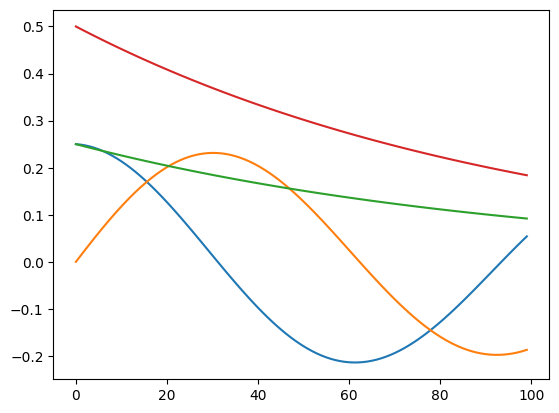

In [173]:
plt.plot(dt.real)
plt.plot(dt.imag)
plt.plot(bt)
plt.plot(result.expect[0])

In [192]:
rho_ss = steadystate(H, c_ops=[np.sqrt(gamma)*n1,np.sqrt(gamma)*n2])

zgstrf info 14


ValueError: Matrix is singular